# Úkol č. 2 - regrese

* Termíny jsou uvedeny na [courses.fit.cvut.cz/BI-ML1/homeworks/index.html](https://courses.fit.cvut.cz/BI-ML1/homeworks/index.html).
* Pokud odevzdáte úkol po prvním termínu, ale před nejzazším termínem, budete penalizování -12 body, pozdější odevzdání je bez bodu.
* V rámci tohoto úkolu se musíte vypořádat s regresní úlohou, s příznaky různých typů a s chybějícími hodnotami.
* Před tím, než na nich postavíte predikční model, je třeba je nějakým způsobem převést do číselné reprezentace.
    
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

Využívejte buňky typu `Markdown` k vysvětlování Vašeho postupu. Za nepřehlednost budeme strhávat body.

## Zdroj dat

Budeme se zabývat predikcí délky dožití v různých zemích a letech.
K dispozici máte trénovací data v souboru `data.csv` a data na vyhodnocení v souboru `evaluation.csv`.

#### Seznam příznaků:

* Year - Rok
* Status - Status rozvinuté nebo rozvojové země
* Life expectancy - Délka dožití v letech - **cílová proměnná, kterou budete predikovat**
* Adult Mortality - Úmrtnost dospělých bez ohledu na pohlaví (pravděpodobnost, že osoby, které dosáhly věku 15 let, zemřou před dosažením věku 60 let (uvedeno na 1 000 osob)).
* infant deaths - počet zemřelých kojenců na 1000 obyvatel
* Alcohol - Alkohol, zaznamenaná spotřeba na obyvatele (15+) (v litrech čistého alkoholu)
* percentage expenditure - Výdaje na zdravotnictví v procentech hrubého domácího produktu na obyvatele (%)
* Hepatitis B - pokrytí očkováním proti hepatitidě B (HepB) u dětí ve věku 1 roku (%)
* Measles - Spalničky - počet hlášených případů na 1000 obyvatel
* BMI - průměrný index tělesné hmotnosti celé populace
* under-five deaths - počet úmrtí dětí do pěti let na 1000 obyvatel
* Polio - proočkovanost proti dětské obrně (Pol3) u dětí ve věku 1 roku (%)
* Total expenditure - Výdaje vládních institucí na zdravotnictví jako procento celkových vládních výdajů (%)
* Diphtheria - pokrytí očkováním proti záškrtu, tetanu a černému kašli (DTP3) u jednoletých dětí (%)
* HIV/AIDS - počet úmrtí na 1 000 živě narozených dětí na HIV/AIDS (0-4 roky)
* GDP - hrubý domácí produkt na obyvatele (v USD)
* Population - počet obyvatel země
* thinness 1-19 years - podíl dětí ve věku 10-19 let s indexem tělesné hmotnosti (BMI) menším než 2 směrodatné odchylky pod mediánem (%)
* thinness 5-9 years - podíl dětí ve věku 5-9 let s indexem tělesné hmotnosti (BMI) menším než 2 směrodatné odchylky pod mediánem (%)
* Income composition of resources - Index lidského rozvoje z hlediska příjmového složení zdrojů (index v rozmezí 0 až 1)
* Schooling - počet let školní docházky (roky)


## Pokyny k vypracování

**Body zadání**, za jejichž (poctivé) vypracování získáte **25 bodů**: 
  * V notebooku načtěte data ze souboru `data.csv`. Vhodným způsobem si je rozdělte na podmnožiny, které Vám poslouží pro trénování (trénovací), porovnávání modelů (validační) a následnou predikci výkonnosti finálního modelu (testovací).
    
  * Proveďte základní předzpracování dat:
    * Projděte si jednotlivé příznaky a transformujte je do vhodné podoby pro použití ve vybraném regresním modelu.
    * Nějakým způsobem (klidně triviálním) se vypořádejte s chybějícími hodnotami. _Pozor na metodické chyby!_
    * Můžete využívat i vizualizace. Vše stručně ale náležitě komentujte.
<br /><br />
  * Vytvořte **vlastní implementaci náhodného lesa**. Použijte k tomu níže předpřipravenou kostru.
  
  * Na připravená data postupně aplikujte Vaši předchozí implementaci modelu náhodného lesa, dále jeden z modelů **lineární regrese** nebo **hřebenové regrese**, a alespoň jeden další model podle Vašeho uvážení, přičemž pro každý z těchto modelů přiměřeně:
    * Okomentujte vhodnost daného modelu pro daný typ úlohy.
    * Experimentujte s normalizací (standardizace/min-max), pokud pro daný model očekáváte její příznivý vliv.
    * Vyberte si hlavní hyperparametry k ladění a najděte jejich nejlepší hodnoty (vzhledem k RMSE).
    * Pro model s nejlepšími hodnotami hyperparametrů na validační množině určete jeho chybu pomocí RMSE a MAE.
    * Získané výsledky vždy řádně okomentujte.
<br /><br />
  * Ze všech zkoušených možností v předchozím kroku vyberte finální model a správně odhadněte, jakou chybu (RMSE) můžete očekávat na nových datech, která jste doposud neměli k dispozici. _Pozor na metodické chyby!_
    
  * Nakonec načtěte vyhodnocovací data ze souboru `evaluation.csv`. Pomocí finálního modelu napočítejte predikce pro tyto data. Vytvořte soubor `results.csv`, ve kterém získané predikce uložíte do sloupce **Life expectancy** a jednotlivé body identifikujete pomocí sloupců **Country** a **Year** (dodržte názvy sloupců!). Tento soubor též odevzdejte (uložte do repozitáře vedle notebooku).

  * Ukázka, jak by mělo vypadat prvních několik řádků souboru `results.csv` (obecně s jinými hodnotami Life expectancy):
  
```
Country,Year,Life expectancy
Peru,2012,71.4
Peru,2013,72.6
...
```


## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-ML1/homeworks/index.html.

# Data preprocessing

**Import needed libraries**

In [75]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.metrics import root_mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
import sklearn.metrics as metrics
from sklearn.linear_model import Ridge
from sklearn.ensemble import AdaBoostRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import optimize
from sklearn.preprocessing import StandardScaler, MinMaxScaler
%matplotlib inline

random_seed = 58

**Read the dataset and display the first few rows**

In [76]:
df = pd.read_csv("data.csv")
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


**Display the info and description of the dataset**

In [77]:
display(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2718 entries, 0 to 2717
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2718 non-null   object 
 1   Year                             2718 non-null   int64  
 2   Status                           2718 non-null   object 
 3   Life expectancy                  2718 non-null   float64
 4   Adult Mortality                  2718 non-null   float64
 5   infant deaths                    2718 non-null   int64  
 6   Alcohol                          2558 non-null   float64
 7   percentage expenditure           2718 non-null   float64
 8   Hepatitis B                      2187 non-null   float64
 9   Measles                          2718 non-null   int64  
 10  BMI                              2686 non-null   float64
 11  under-five deaths                2718 non-null   int64  
 12  Polio               

None

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2718.000000,2718.000000,2718.000000,2718.000000,2558.000000,2718.000000,2187.000000,2718.000000,2686.000000,2718.000000,2699.000000,2526.000000,2699.000000,2718.000000,2311.000000,2.104000e+03,2686.000000,2686.000000,2570.000000,2570.000000
mean,2007.113687,69.059308,165.771523,31.811994,4.581040,752.607792,80.838592,2571.444812,37.633060,44.077631,82.564283,5.859426,82.166358,1.826343,7498.829210,1.325711e+07,4.953611,4.995272,0.622851,11.922218
std,4.537979,9.562092,125.544472,122.257704,4.033137,2012.366099,25.264167,11893.625719,19.812908,166.281655,23.380578,2.431144,23.937591,5.257269,14387.883939,6.340774e+07,4.512805,4.606148,0.213593,3.367619
min,2000.000000,39.000000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2003.000000,63.000000,74.000000,0.000000,0.930000,5.664238,77.000000,0.000000,18.900000,0.000000,78.000000,4.220000,78.000000,0.100000,451.964816,1.966738e+05,1.600000,1.600000,0.492000,10.100000
50%,2007.000000,71.900000,144.000000,3.000000,3.675000,65.268121,92.000000,18.000000,42.200000,4.000000,93.000000,5.665000,93.000000,0.100000,1721.973863,1.396923e+06,3.400000,3.400000,0.673000,12.300000
75%,2011.000000,75.500000,227.000000,23.000000,7.600000,443.087991,97.000000,408.000000,55.700000,30.000000,97.000000,7.440000,97.000000,0.800000,5848.736168,7.523594e+06,7.300000,7.300000,0.776000,14.200000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,77.600000,2500.000000,99.000000,17.000000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.938000,20.700000


**As we can see, there are some columns with data represented in string, change type to num**

In [78]:
for col in df:
    if df[col].dtype == object:
        df[col] = df[col].astype("category").cat.codes

**Show the correlation of the columns between each other using heatmap**

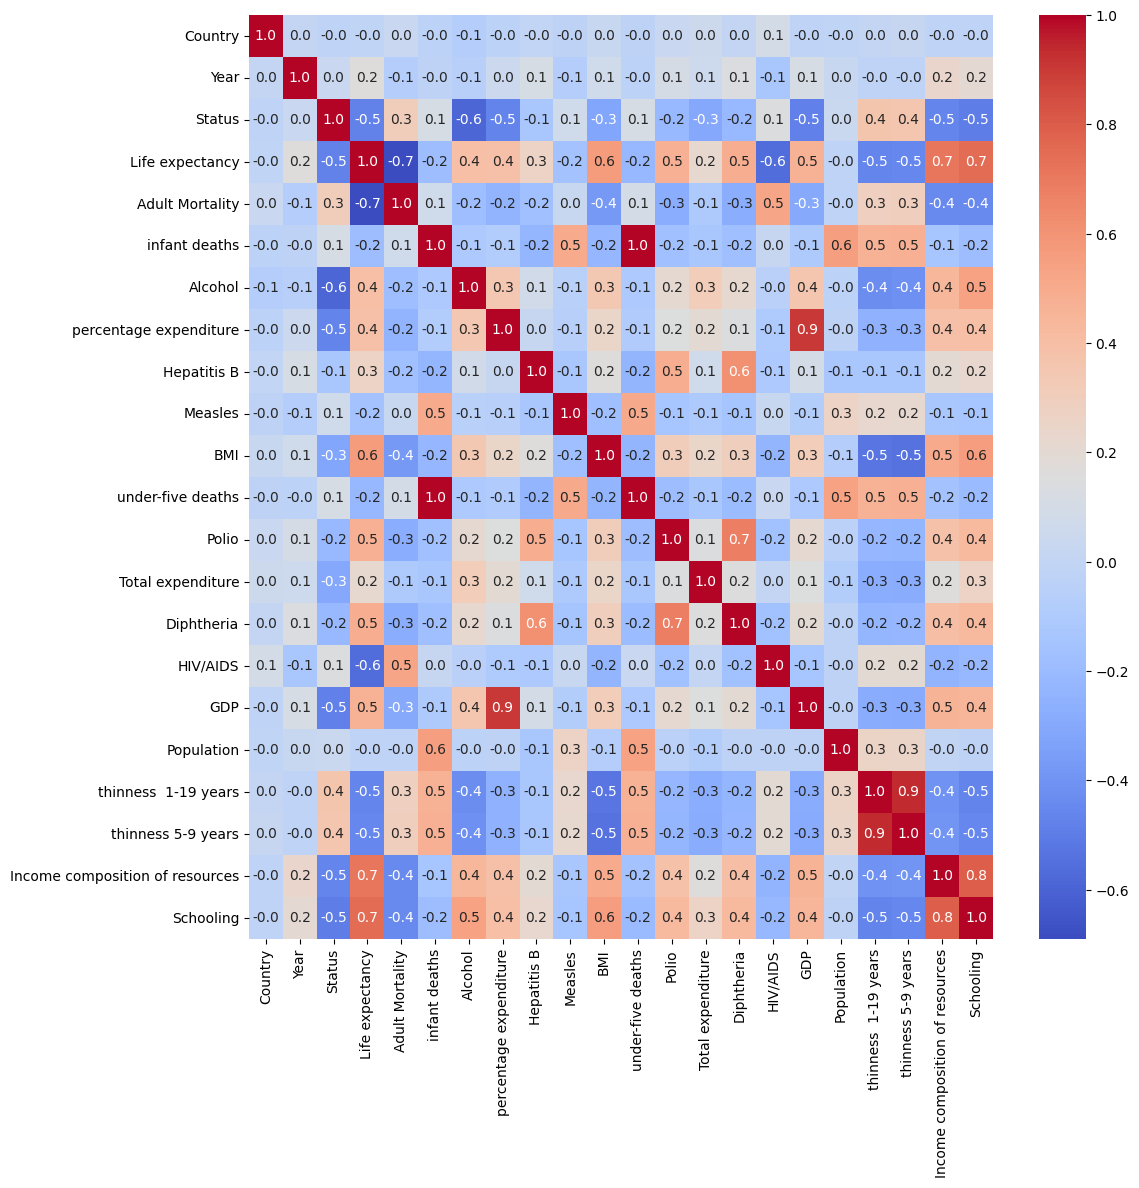

In [79]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, fmt = ".1f", cmap = "coolwarm")
plt.show()

**We can see from the heatmap, that correlation between "Life Expentancy" column and "County", "Population" columns equals to 0, I will delete those columns from the dataset, as they have no affect on the Life Expectancy**

In [80]:
df.drop(["Country", "Population"], axis = 1, inplace = True)

**Inspect how much missing values are there in the df**

In [81]:
df.isna().sum()

Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            160
percentage expenditure               0
Hepatitis B                        531
Measles                              0
BMI                                 32
under-five deaths                    0
Polio                               19
Total expenditure                  192
Diphtheria                          19
HIV/AIDS                             0
GDP                                407
thinness  1-19 years                32
thinness 5-9 years                  32
Income composition of resources    148
Schooling                          148
dtype: int64

**Split the data into the training/validation/testing (0.6, 0.24, 0.16)**

In [82]:
Xdata = df.drop("Life expectancy", axis = 1)
ydata = df["Life expectancy"]

Xtrain, Xtest, ytrain, ytest = train_test_split(Xdata, ydata, test_size = 0.4, random_state = random_seed)
Xval, Xtest, yval, ytest = train_test_split(Xtest, ytest, test_size = 0.4, random_state = random_seed)

**Replacing the missing values with the mean from the train data**

In [83]:
for col in Xtrain:
    if Xtrain[col].isna().sum() > 0:
        to_replace_with = Xtrain[col].mean()
        Xtrain[col] = Xtrain[col].replace(np.nan, to_replace_with)
        Xtest[col] = Xtest[col].replace(np.nan, to_replace_with)
        Xval[col] = Xval[col].replace(np.nan, to_replace_with)

**Check if there are any missing data left**

In [84]:
display(Xtrain.isna().sum().sum())
display(Xval.isna().sum().sum())
display(Xtest.isna().sum().sum())

np.int64(0)

np.int64(0)

np.int64(0)

# Custom Random Forest

In [85]:
# Váš kód zde


########################################################
# Předpřipravená kostra modelu náhodného lesa
class CustomRandomForest:
    """
    Třída Vašeho modelu
    Bude se jednat o model náhodného lesa, kde podmodely tvoří rozhodovací stromy pro regresi.
    Pro podmodely můžete použít implementaci DecisionTreeRegressor ze sklearn.
    """
    def __init__(self, n_estimators, max_samples, max_depth, **kwargs):
        self.n_estimators = n_estimators
        self.max_samples = max_samples
        self.max_depth = max_depth
        self.kwargs = kwargs
        self.trees = []
        """
        Konstruktor modelu
        Základní hyperparametery:
            n_estimators - počet podmodelů - rozhodovacích stromů.
            max_samples - vyberte si, zda tento parametr bude označovat relativní počet bodů (tj. číslo mezi 0 a 1) 
                          nebo absolutní počet bodů (tj. číslo mezi 1 a velikostí trénovací množiny), 
                          které budou pro každý podmodel rozhodovacího stromu náhodně vybrány z trénovací množiny (bootstrap) a použity k jeho trénování.
            max_depth - maximální hloubka každého z podmodelů rozhodovacího stromu.
            kwargs - (volitelně) případné další hyperparametry, které pošlete do podmodelů rozhodovacího stromu
        """ 
    def fit(self, X, y):
        """
        Natrénování modelu. Trénovací data jsou v argumentech X a y.
        Pro trénování podmodelů používejte bootstraping a velikost samplovaného vzorku vezměte z hyperparametru max_samples_fraction
        """
        n_samples = int(self.max_samples * X.shape[0])
        for i in range(self.n_estimators):
            ran_row = np.random.choice(X.shape[0], size = n_samples, replace = True)
            
            X_i = X.iloc[ran_row]
            y_i = y.iloc[ran_row]
            
            clf = DecisionTreeRegressor(max_depth = self.max_depth, **self.kwargs)
            clf.fit(X_i, y_i)
            self.trees.append(clf)


    def predict(self, X):
        """
        Predikce y v zadaných bodech X
        """
        y_i = []
        for i in range(self.n_estimators): 
            y_tree = self.trees[i].predict(X)
            y_i.append(y_tree)
        
        y_i = np.array(y_i)
        ypredicted = np.mean(y_i, axis = 0)
        
        return ypredicted

**Finding the best parameters for the Random Forest**

In [123]:
param_grid = {
    "n_estimators" : range(5, 100, 5),
    "max_samples" : [0.4, 0.6, 0.8, 1.],
    "max_depth" : range(1, 10),
}
param_comb = ParameterGrid(param_grid)

In [124]:
val_metric = []
for params in param_comb:
    RF = CustomRandomForest(**params, random_state = random_seed)
    RF.fit(Xtrain, ytrain)
    val_metric.append(metrics.root_mean_squared_error(yval, RF.predict(Xval)))
    
best_params = param_comb[np.argmin(val_metric)]
print(f"We found the best params {best_params} with validation RMSE {min(val_metric)}.")

We found the best params {'n_estimators': 95, 'max_samples': 0.8, 'max_depth': 9} with validation RMSE 1.9409128919992815.


In [125]:
BestRF = CustomRandomForest(**best_params, random_state = random_seed)
BestRF.fit(Xtrain, ytrain)
print("The RMSE score for the best Random forest model: %f" % metrics.root_mean_squared_error(yval, BestRF.predict(Xval)))
print("The MAE score for the best Random forest model: %f" % metrics.mean_absolute_error(yval, BestRF.predict(Xval)))

The RMSE score for the best Random forest model: 1.974757
The MAE score for the best Random forest model: 1.341648


# Linear Regression or Ridge Regression

**I chose Ridge Regression because the heatmap with correlation in the start of work revealed a high correlation between many of predictors in the dataset, indicating multicollinearity. Ridge regression is more effective in this case**

**The function, that finds the best lambda and returns fitted model**

In [94]:
def get_opt_ridge_model(Xtrain, Xval):
    def ridgemodel_eval(alpha):
        RG = Ridge(alpha = alpha)
        RG.fit(Xtrain, ytrain)
        return root_mean_squared_error(yval, RG.predict(Xval))

    opt_alpha = optimize.minimize_scalar(ridgemodel_eval, options = {'maxiter': 30}, method = 'bounded', bounds = (0.1, 400))
    opt_ridge = Ridge(alpha = opt_alpha.x)
    opt_ridge.fit(Xtrain, ytrain)
    return opt_ridge

**Try different types of scaling (MinMax, Standart) and none to see and choose the best type of scaling for the data for Ridge Regression**

In [126]:
scalers = [MinMaxScaler(), StandardScaler(), None]
for scaler in scalers:
    if scaler == None:
        Xtrain_scaled = Xtrain.copy()
        Xval_scaled = Xval.copy()
    else:
        curr = scaler.fit(Xtrain.copy())
        Xtrain_scaled = curr.transform(Xtrain)
        Xval_scaled = curr.transform(Xval)
        
    opt_ridge = get_opt_ridge_model(Xtrain_scaled, Xval_scaled)
    RMSE_val_opt_ridge = root_mean_squared_error(yval, opt_ridge.predict(Xval_scaled))
    if scaler == None:
        print(f"For no scaling the best RMSE score is: {RMSE_val_opt_ridge}")
    else:    
        print(f"For the scaler: {scaler} the best RMSE score is: {RMSE_val_opt_ridge}")

For the scaler: MinMaxScaler() the best RMSE score is: 3.9542846740038065
For the scaler: StandardScaler() the best RMSE score is: 3.856306738520966
For no scaling the best RMSE score is: 3.8569860981042807


As we can see, the best RMSE score doesn't really differ much from the scalings

In [127]:
BestRDG = get_opt_ridge_model(Xtrain, Xval)
print("The RMSE score for the best Ridge model: %f" % metrics.root_mean_squared_error(yval, clfBestRDG.predict(Xval)))
print("The MAE score for the best Ridge forest model: %f" % metrics.mean_absolute_error(yval, clfBestRDG.predict(Xval)))

The RMSE score for the best Ridge model: 3.856986
The MAE score for the best Ridge forest model: 2.918340


# Ada Boost

In [120]:
param_grid = {
    "n_estimators": range(5, 100, 5),
    "max_depth": range(1,10),
    "criterion": ["squared_error", "friedman_mse", "absolute_error", "poisson"]
}
param_comb = ParameterGrid(param_grid)

In [121]:
val_metric = []
for params in param_comb:
    tree_params = {key: params.pop(key) for key in ["max_depth", "criterion"]}
    params["estimator"] = DecisionTreeRegressor(**tree_params)
    dt = AdaBoostRegressor(**params, random_state = random_seed).fit(Xtrain, ytrain)
    val_metric.append(metrics.root_mean_squared_error(yval, dt.predict(Xval)))
best_params = param_comb[np.argmin(val_metric)]
print(f"We found the best params {best_params} with validation RMSE {min(val_metric)}.")

We found the best params {'n_estimators': 90, 'max_depth': 9, 'criterion': 'friedman_mse'} with validation RMSE 1.8165109128388053.


In [122]:
tree_params = {key: best_params.pop(key) for key in ["max_depth", "criterion"]}
best_params["estimator"] = DecisionTreeRegressor(**tree_params)
BestAB = AdaBoostRegressor(**best_params, random_state=random_seed).fit(Xtrain, ytrain)
print("The RMSE score for the best Ada Boost model: %f" % metrics.root_mean_squared_error(yval, BestAB.predict(Xval)))
print("The MAE score for the best Ada Boost model: %f" % metrics.mean_absolute_error(yval, BestAB.predict(Xval)))

The RMSE score for the best Ada Boost model: 1.816511
The MAE score for the best Ada Boost model: 1.202285


# As the final model I choose Ada Boost, as it showed the best resuts on the validation data

In [98]:
best_model = BestAB

print("The RMSE score for the best model: %f" % metrics.root_mean_squared_error(ytest, BestAB.predict(Xtest)))
print("The MAE score for the best model: %f" % metrics.mean_absolute_error(ytest, BestAB.predict(Xtest)))

The RMSE score for the best model: 1.869663
The MAE score for the best model: 1.248371


**On the new data, that the model has never seen, we can expect to have 1.86 RMSE score**

# Prediction for the new data

In [129]:
pr = pd.read_csv("evaluation.csv")
display(pr.head())
display(pr.info())

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Albania,2015,Developing,74.0,0,4.60,364.975229,99.0,0,58.0,...,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
1,Albania,2014,Developing,8.0,0,4.51,428.749067,98.0,0,57.2,...,98.0,5.88,98.0,0.1,4575.763787,288914.0,1.2,1.3,0.761,14.2
2,Albania,2013,Developing,84.0,0,4.76,430.876979,99.0,0,56.5,...,99.0,5.66,99.0,0.1,4414.723140,289592.0,1.3,1.4,0.759,14.2
3,Albania,2012,Developing,86.0,0,5.14,412.443356,99.0,9,55.8,...,99.0,5.59,99.0,0.1,4247.614380,2941.0,1.3,1.4,0.752,14.2
4,Albania,2011,Developing,88.0,0,5.37,437.062100,99.0,28,55.1,...,99.0,5.71,99.0,0.1,4437.178680,295195.0,1.4,1.5,0.738,13.3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          210 non-null    object 
 1   Year                             210 non-null    int64  
 2   Status                           210 non-null    object 
 3   Adult Mortality                  210 non-null    float64
 4   infant deaths                    210 non-null    int64  
 5   Alcohol                          177 non-null    float64
 6   percentage expenditure           210 non-null    float64
 7   Hepatitis B                      188 non-null    float64
 8   Measles                          210 non-null    int64  
 9   BMI                              210 non-null    float64
 10  under-five deaths                210 non-null    int64  
 11  Polio                            210 non-null    float64
 12  Total expenditure     

None

**Making the same manipuation with the data as before with the main dataset**

In [130]:
for col in pr:
    if pr[col].dtype == object:
        pr[col] = pr[col].astype("category").cat.codes

In [131]:
pr.drop(["Country", "Population"], axis = 1, inplace = True)
pr.isna().sum()

Year                                0
Status                              0
Adult Mortality                     0
infant deaths                       0
Alcohol                            33
percentage expenditure              0
Hepatitis B                        22
Measles                             0
BMI                                 0
under-five deaths                   0
Polio                               0
Total expenditure                  34
Diphtheria                          0
HIV/AIDS                            0
GDP                                36
thinness  1-19 years                0
thinness 5-9 years                  0
Income composition of resources    12
Schooling                          12
dtype: int64

In [132]:
for col in pr:
    if pr[col].isna().sum() > 0:
        to_replace_with = Xtrain[col].mean()
        pr[col] = pr[col].replace(np.nan, to_replace_with)

In [133]:
pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             210 non-null    int64  
 1   Status                           210 non-null    int8   
 2   Adult Mortality                  210 non-null    float64
 3   infant deaths                    210 non-null    int64  
 4   Alcohol                          210 non-null    float64
 5   percentage expenditure           210 non-null    float64
 6   Hepatitis B                      210 non-null    float64
 7   Measles                          210 non-null    int64  
 8   BMI                              210 non-null    float64
 9   under-five deaths                210 non-null    int64  
 10  Polio                            210 non-null    float64
 11  Total expenditure                210 non-null    float64
 12  Diphtheria            

In [134]:
pr.isna().sum().sum()

np.int64(0)

In [135]:
pr.head()

,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,1,74.0,0,4.60,364.975229,99.0,0,58.0,0,99.0,6.00,99.0,0.1,3954.227830,1.2,1.3,0.762,14.2
1,2014,1,8.0,0,4.51,428.749067,98.0,0,57.2,1,98.0,5.88,98.0,0.1,4575.763787,1.2,1.3,0.761,14.2
2,2013,1,84.0,0,4.76,430.876979,99.0,0,56.5,1,99.0,5.66,99.0,0.1,4414.723140,1.3,1.4,0.759,14.2
3,2012,1,86.0,0,5.14,412.443356,99.0,9,55.8,1,99.0,5.59,99.0,0.1,4247.614380,1.3,1.4,0.752,14.2
4,2011,1,88.0,0,5.37,437.062100,99.0,28,55.1,1,99.0,5.71,99.0,0.1,4437.178680,1.4,1.5,0.738,13.3


In [136]:
predictions = best_model.predict(pr)

In [137]:
tmp = pd.read_csv("evaluation.csv")
tmp = tmp[["Country", "Year"]]
tmp["expectancy"] = predictions

In [138]:
tmp.to_csv("results.csv", index = False)

**THE END**